In [1]:
# import packages
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.stats as sms
import statsmodels.stats.api as smss
from scipy import stats
import numpy as np
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve


C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# import data
df = pd.read_csv('BGVSpringboardData.csv')

In [3]:
#Set TourID to index
df= df.set_index('TourID_dimension')

# create dictionary to change binary categorical output variable to an integer
dic={'Sale':1,'No Sale':0}

# convert categorical output variable to binary
df['ResultOfTour']=df['ResultOfTour'].replace(dic)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14445 entries, 146456 to 381090
Data columns (total 11 columns):
Age                           14445 non-null int64
AgentLine                     14445 non-null object
BookingWindow                 14445 non-null object
FirstGenVsOwner               14445 non-null object
HHIncomeRanges                14445 non-null object
Homeowner                     14445 non-null object
InState                       14445 non-null object
Programs (Budget)             14445 non-null object
relationStatus                14445 non-null object
ResultOfTour                  14445 non-null int64
NetVolumePlusNonGoodVolume    14445 non-null float64
dtypes: float64(1), int64(2), object(8)
memory usage: 1.3+ MB
None


In [4]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek


dfX = df.drop(['ResultOfTour',  'AgentLine', 'NetVolumePlusNonGoodVolume'], axis = 1)

dfX = pd.get_dummies(dfX, prefix=['BookingWindow', 'FirstGenVsOwner',
       'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)',
       'relationStatus'])
                                  
scaler1 = StandardScaler()
scaler1.fit(dfX[['Age']])
dfX['Age'] = scaler1.transform(dfX[['Age']])
       

X_train, X_test, y_train, y_test = train_test_split(dfX, df['ResultOfTour'], stratify=df['ResultOfTour'], test_size=0.2,random_state = 42)




dfX1 = X_train
dfY1 = y_train


# define resampling method
resample = SMOTE(random_state=42, ratio = 'minority')

dfX2, dfY2 = resample.fit_sample(dfX1, dfY1)
dfX2= pd.DataFrame(dfX2, columns = dfX.columns)
dfY2= pd.DataFrame(dfY2)

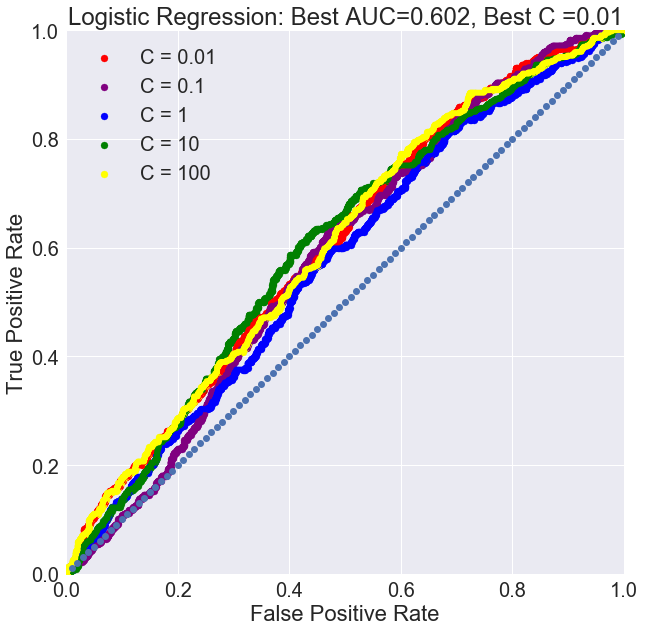

In [5]:


bestC = 0
bestAUCC = 0
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of c values and kfold
Cs = [0.01, 0.1, 1,10,100]
kf = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set(font_scale = 2)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX1,dfY1):
    xTrain = dfX1.iloc[train.tolist()]
    yTrain = dfY1.iloc[train.tolist()]
    xTrain, yTrain = resample.fit_sample(xTrain,yTrain)
    lr = LogisticRegression(C=Cs[i])
    lr.fit(xTrain,yTrain)
    preds = lr.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY1.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCC:
        bestC=Cs[i]
        bestAUCC=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='C = '+str(Cs[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('Logistic Regression: Best AUC='+str(round(bestAUCC,3))+', Best C ='+str(bestC))
x = np.arange(1, 100)/100
y=x
plt.plot(x,y,'o')
plt.show()

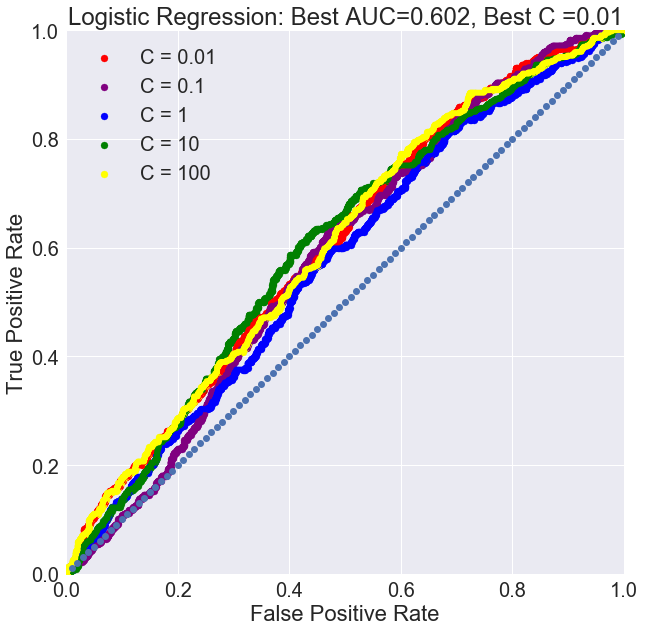

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve

bestC = 0
bestAUCC = 0
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of c values and kfold
Cs = [0.01, 0.1, 1,10,100]
kf = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set(font_scale = 2)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX1,dfY1):
    xTrain = dfX1.iloc[train.tolist()]
    yTrain = dfY1.iloc[train.tolist()]
    xTrain, yTrain = resample.fit_sample(xTrain,yTrain)
    lr = LogisticRegression(C=Cs[i])
    lr.fit(xTrain,yTrain)
    preds = lr.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY1.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCC:
        bestC=Cs[i]
        bestAUCC=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='C = '+str(Cs[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('Logistic Regression: Best AUC='+str(round(bestAUCC,3))+', Best C ='+str(bestC))
x = np.arange(1, 100)/100
y=x
plt.plot(x,y,'o')
plt.show()

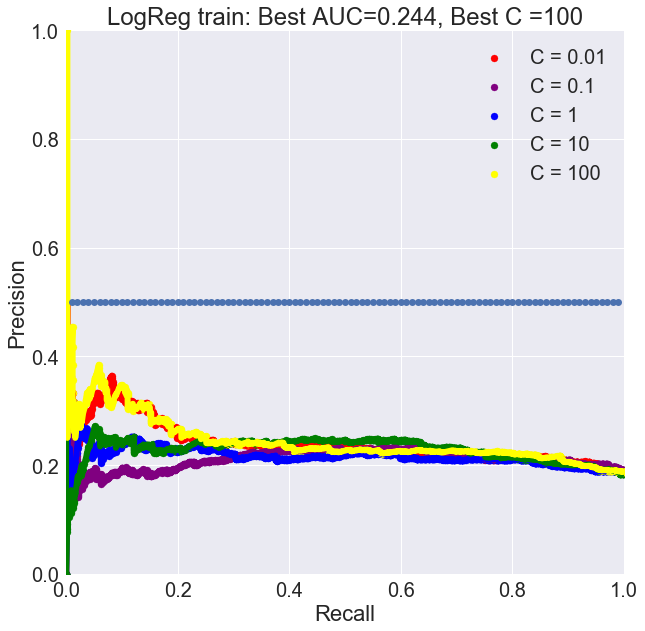

In [7]:
# from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve

bestC1 = 0
bestAUCC1 = 0
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of c values and kfold
Cs = [0.01, 0.1, 1,10,100]
kf = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set(font_scale = 2)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Recall')
plt.ylabel('Precision')

for train, test in kf.split(dfX1,dfY1):
    xTrain = dfX1.iloc[train.tolist()]
    yTrain = dfY1.iloc[train.tolist()]
    xTrain, yTrain = resample.fit_sample(xTrain,yTrain)
    lr = LogisticRegression(C=Cs[i])
    lr.fit(xTrain,yTrain)
    preds = lr.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    p, r, _ = precision_recall_curve(dfY1.iloc[test.tolist()], preds)
    auc = metrics.auc(r,p)
    if auc>bestAUCC1:
        bestC1=Cs[i]
        bestAUCC1=auc
    i += 1 
    plt.scatter(x=r, y=p, c = colors[i-1],label='C = '+str(Cs[i-1]))
    plt.plot(r,p, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('LogReg train: Best AUC='+str(round(bestAUCC1,3))+', Best C ='+str(bestC1))
x1 = np.arange(1,100)/100
y1 = np.repeat(0.5,99)
plt.plot(x1,y1,'o')
plt.show()

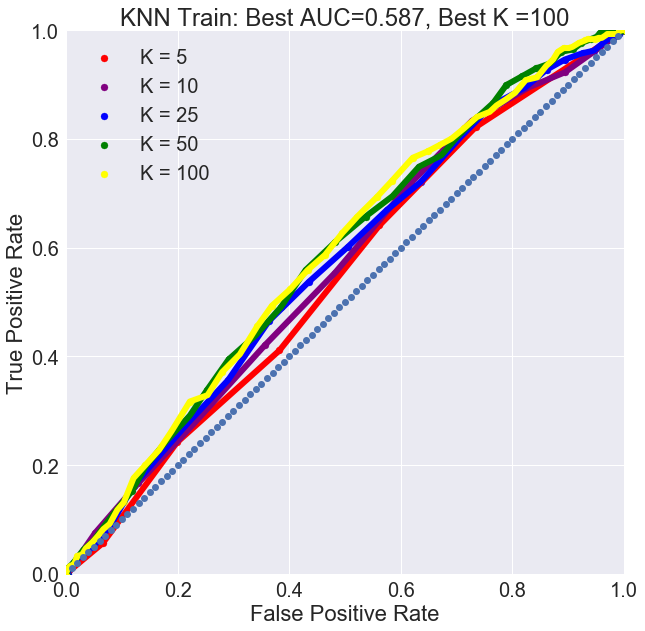

In [8]:
from sklearn.neighbors import KNeighborsClassifier


bestK = 0
bestAUCK = 0
i = 0
colors= ['red','purple','blue','green','yellow']
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#make cross validation of K values and kfold
Ks = [5,10,25,50,100]

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)

#create oversampler

#ROC plot of model accuracy
sns.set(font_scale = 2)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX1,dfY1):
    xTrain = dfX1.iloc[train.tolist()]
    yTrain = dfY1.iloc[train.tolist()]
    xTrain, yTrain = resample.fit_sample(xTrain,yTrain)
    knn = KNeighborsClassifier(Ks[i])
    knn.fit( xTrain , yTrain)
    preds = knn.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY1.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCK:
        bestK=Ks[i]
        bestAUCK=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='K = '+str(Ks[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('KNN Train: Best AUC='+str(round(bestAUCK,3))+', Best K ='+str(bestK))
plt.plot(x,y,'o')
plt.show()


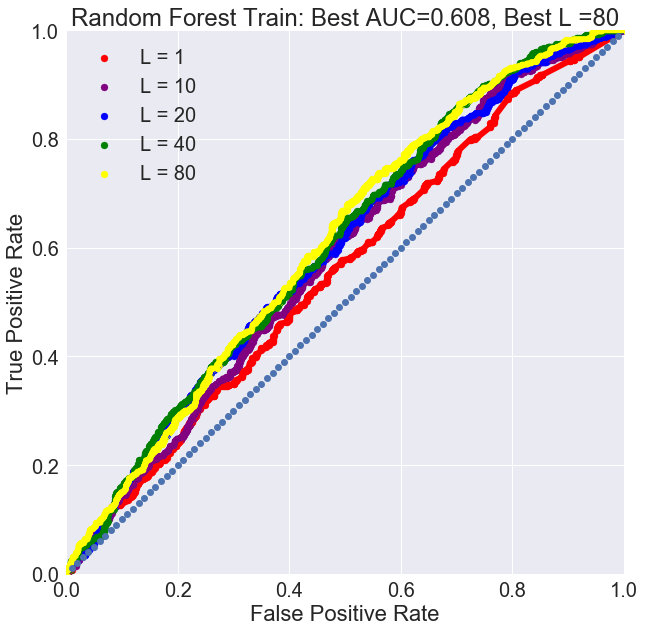

In [9]:
from sklearn.ensemble import RandomForestClassifier

bestL = 0
bestAUCL = 0
bestFeatureImportances= []
i = 0
colors= ['red','purple','blue','green','yellow']
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#make cross validation of K values and kfold
Ls = [1,10,20,40,80]

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set(font_scale = 2)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX1,dfY1):
    xTrain = dfX1.iloc[train.tolist()]
    yTrain = dfY1.iloc[train.tolist()]
    xTrain, yTrain = resample.fit_sample(xTrain,yTrain)
    rfr = RandomForestClassifier(n_estimators=100,min_samples_leaf=Ls[i], random_state=42)
    rfr.fit(xTrain,yTrain)
    preds = rfr.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY1.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCL:
        bestL=Ls[i]
        bestAUCL=auc
        bestFeatureImportances = rfr.feature_importances_
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='L = '+str(Ls[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('Random Forest Train: Best AUC='+str(round(bestAUCL,3))+', Best L ='+str(bestL))
plt.plot(x,y,'o')
plt.show()

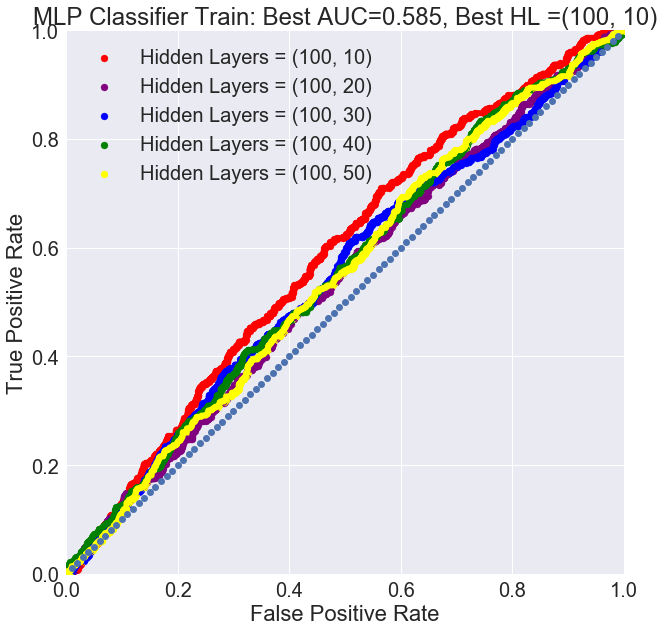

In [10]:
from sklearn.neural_network import MLPClassifier

bestHL = 0
bestAUCHL = 0
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of c values and kfold
HLs = [(100,10), (100,20), (100,30), (100,40), (100,50)]
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set(font_scale = 2)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX1,dfY1):
    xTrain = dfX1.iloc[train.tolist()]
    yTrain = dfY1.iloc[train.tolist()]
    xTrain, yTrain = resample.fit_sample(xTrain,yTrain)
    lr = MLPClassifier(hidden_layer_sizes=HLs[i])
    lr.fit(xTrain,yTrain)
    preds = lr.predict_proba(dfX1.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY1.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCHL:
        bestHL=HLs[i]
        bestAUCHL=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='Hidden Layers = '+str(HLs[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('MLP Classifier Train: Best AUC='+str(round(bestAUCHL,3))+', Best HL ='+str(bestHL))
x = np.arange(1, 100)/100
y=x
plt.plot(x,y,'o')
plt.show()

C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

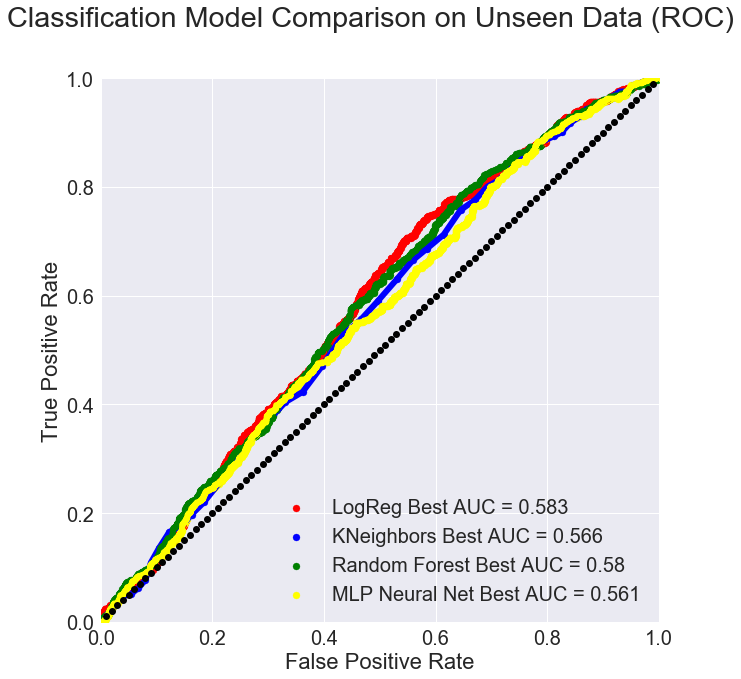

In [11]:
#logistic regregression best model 
lr = LogisticRegression(C=bestC)
lr.fit(dfX2,dfY2)
preds = lr.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
auc = metrics.auc(fpr,tpr)
# change  figure size
mpl.rcParams['figure.figsize'] = (10,10)
sns.set(font_scale = 2)
#plot ROC Curves of Logistic regression models using best Cs to from kFold Cross Validation
plt.scatter(x=fpr, y=tpr, color = 'Red', label= 'LogReg Best AUC = '+ str(round(auc,3)))
plt.plot(fpr,tpr,color= 'Red',linewidth=6.0)


#knn best model 
knn = KNeighborsClassifier(bestK)
knn.fit(dfX2,dfY2)
preds = knn.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
auc = metrics.auc(fpr,tpr)
plt.scatter(x=fpr, y=tpr, color = 'Blue', label= 'KNeighbors Best AUC = '+ str(round(auc,3)))
plt.plot(fpr,tpr,color= 'Blue',linewidth=6.0)

#random forest best model 
clf = RandomForestClassifier(n_estimators=100,min_samples_leaf =bestL,random_state=42)
clf.fit(dfX2,dfY2)
preds = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
auc = metrics.auc(fpr,tpr)
plt.scatter(x=fpr, y=tpr, color = 'Green', label= 'Random Forest Best AUC = '+ str(round(auc,3)))
plt.plot(fpr,tpr,color= 'Green',linewidth=6.0)

# Neural Net MLPClassifier
clf = MLPClassifier()
clf.fit(dfX2,dfY2)
preds = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
auc = metrics.auc(fpr,tpr)
plt.scatter(x=fpr, y=tpr, color = 'Yellow', label= 'MLP Neural Net Best AUC = '+ str(round(auc,3)))
plt.plot(fpr,tpr,color= 'Yellow',linewidth=6.0)

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.plot(x,y,'o', color='Black')
plt.suptitle('Classification Model Comparison on Unseen Data (ROC)')
plt.show()

C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

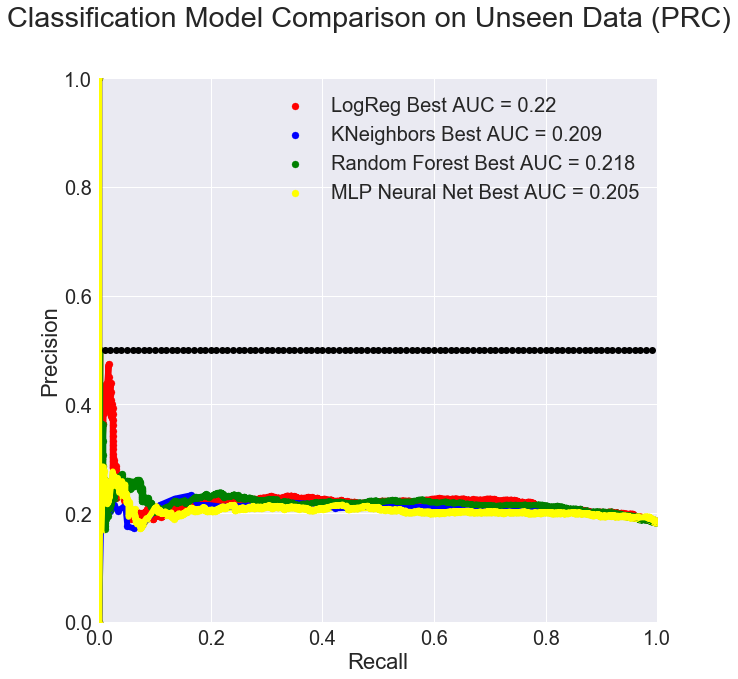

In [12]:
# change  figure size
mpl.rcParams['figure.figsize'] = (10,10)
sns.set(font_scale = 2)
#logistic regregression best model 
lr = LogisticRegression(C=bestC)
lr.fit(dfX2,dfY2)
preds = lr.predict_proba(X_test)[:,1]
p,r, threshold = precision_recall_curve(y_test, preds)
auc = metrics.auc(r,p)
#plot ROC Curves of Logistic regression models using best Cs to from kFold Cross Validation
plt.scatter(x=r, y=p, color = 'Red', label= 'LogReg Best AUC = '+ str(round(auc,3)))
plt.plot(r,p,color= 'Red',linewidth=6.0)


#knn best model 
knn = KNeighborsClassifier(bestK)
knn.fit(dfX2,dfY2)
preds = knn.predict_proba(X_test)[:,1]
p,r, threshold = precision_recall_curve(y_test, preds)
auc = metrics.auc(r,p)
plt.scatter(x=r, y=p, color = 'Blue', label= 'KNeighbors Best AUC = '+ str(round(auc,3)))
plt.plot(r,p,color= 'Blue',linewidth=6.0)

#random forest best model 
clf = RandomForestClassifier(n_estimators=100,min_samples_leaf =bestL,random_state=42)
clf.fit(dfX2,dfY2)
preds = clf.predict_proba(X_test)[:,1]
p,r, threshold = precision_recall_curve(y_test, preds)
auc = metrics.auc(r,p)
plt.scatter(x=r, y=p, color = 'Green', label= 'Random Forest Best AUC = '+ str(round(auc,3)))
plt.plot(r,p,color= 'Green',linewidth=6.0)

# Neural Net MLPClassifier
clf = MLPClassifier()
clf.fit(dfX2,dfY2)
preds = clf.predict_proba(X_test)[:,1]
p,r, threshold = precision_recall_curve(y_test, preds)
auc = metrics.auc(r,p)
plt.scatter(x=r, y=p, color = 'Yellow', label= 'MLP Neural Net Best AUC = '+ str(round(auc,3)))
plt.plot(r,p,color= 'Yellow',linewidth=6.0)

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.plot(x1,y1,'o', color='Black')
plt.suptitle('Classification Model Comparison on Unseen Data (PRC)')
plt.show()